In [1]:
import numpy as np
import statsmodels.api as sm
import sympy as sym
from scipy.special import expit, softmax

***
### __Простейшие нейронные сети__

__Задача__. Дана однослойная нейронная сеть с линейными связями, нейроном сдвига (_bias_) $1$. 
<br>Определить состояния нейрона на выходе при данных входных векторах __`X`__ и весах связей __`weights`__.

In [2]:
X = np.array([[1, 1, 1],
              [1, 2, 3],
              [-5, 7, -2]])

weights = np.array([2, 3, 1, -3])

In [3]:
np.c_[np.ones(X.shape[0]), X]

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  2.,  3.],
       [ 1., -5.,  7., -2.]])

In [4]:
X = sm.add_constant(X)  # prepend=True by default
X

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  2.,  3.],
       [ 1., -5.,  7., -2.]])

In [5]:
X @ weights

array([ 3., -2.,  0.])

__Задача__. Вычислить выход нейронной сети на входном векторе $(1,2,3)$.

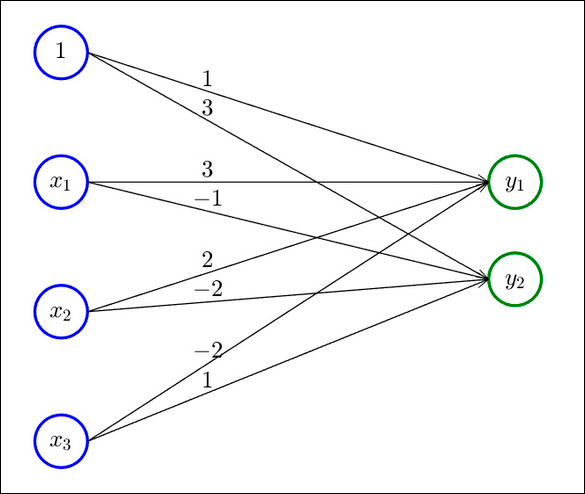

In [6]:
w = np.array([[1, 3], [3, -1], [2, -2], [-2, 1]])
X = np.array([1, 1, 2, 3])
X @ w

array([2, 1])

In [7]:
w.T @ X

array([2, 1])

__Задача__. При данных ниже матрицах весов вычислить выход нейронной сети на входном векторе $(-1,2)$.

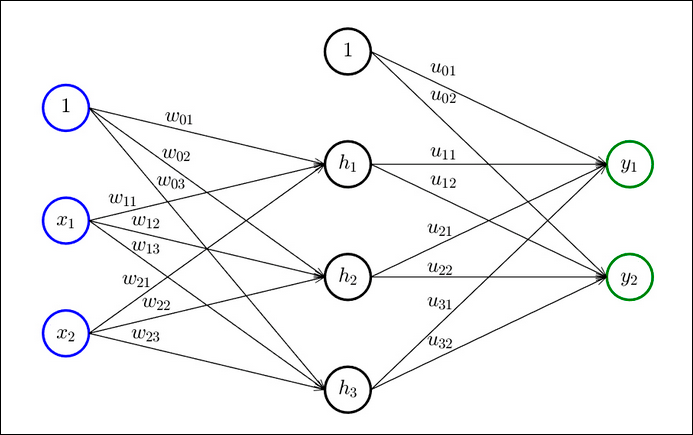

In [8]:
W = np.array([[1, -1, 2],
              [-2, 2, 0],
              [0, 0, -3]])

U = np.array([[-2, -3],
              [-3, -1],
              [2, -2],
              [-3, -2]])

x = np.array([-1, 2])

h = W.T @ np.insert(x, 0, 1)  # hidden layer
y = U.T @ np.insert(h, 0, 1)
y

array([-5,  8])

***
### __Замена двухслойной сети эквивалентной однослойной__
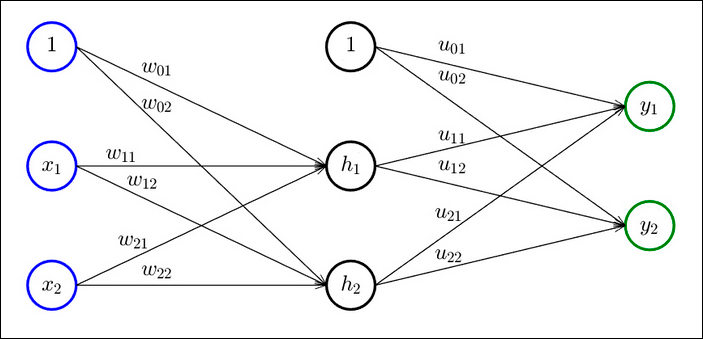

In [9]:
W = np.array([[1, 1], [0, 1], [1, 1]])
U = np.array([[1, 0], [1, 1], [1, 0]])
x1, x2 = sym.symbols('x1 x2')
x = np.insert([x1, x2], 0, 1)
h = np.insert(W.T @ x, 0, 1)
y = U.T @ h
y

array([x1 + 2*x2 + 3, x2 + 1], dtype=object)

Или:

In [10]:
W = sym.Matrix([[1, 1], [0, 1], [1, 1]])
U = sym.Matrix([[1, 0], [1, 1], [1, 0]])
x = sym.Matrix([1] + [sym.Indexed('x', i) for i in (1, 2)])
h = (W.T @ x).row_insert(0, sym.Matrix([1]))
y = U.T @ h
y

Matrix([
[x[1] + 2*x[2] + 3],
[         x[2] + 1]])

In [11]:
np.array([[3, 1, 2], [1, 0, 1]]).T  # 3 и 1 - коэффициенты перед x0

array([[3, 1],
       [1, 0],
       [2, 1]])

__Вывод__: $n$ подряд идущих линейных слоев эквивалентны одному, и потому такая структура не имеет смысла. Композиция линейных слоев линейна.

***
### __Функции активации__

In [12]:
def ReLU(X):
    """Rectified Linear Unit. """
    # element-wise max
    return np.maximum(0, X)

In [13]:
ReLU(np.array([-3, 4, 2, 0, -2]))

array([0, 4, 2, 0, 0])

__Задача__.

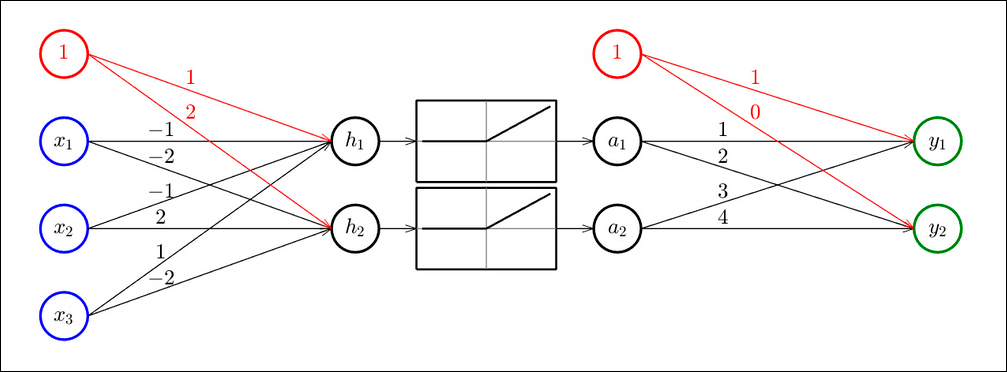

In [14]:
W = np.array([[1, 2], [-1, -2], [-1, 2], [1, -2]])
U = np.array([[1, 0], [1, 2], [3, 4]])
x = np.array([1, 2, 3])

h = W.T @ np.insert(x, 0, 1)
y = U.T @ np.insert(ReLU(h), 0, 1)
y

array([2, 2])

In [15]:
def leakyReLU(X, coeff=.5):
    return np.where(X > 0, X, coeff * X)

[__Сигмоидальная функция__](https://scipy.github.io/devdocs/reference/generated/scipy.special.expit.html#scipy-special-expit), $\sigma(t) = \frac{1}{1 + e^{-t}}$, для простейшей бинарной классификации:

In [16]:
def classify(val, threshold):
    proba = expit(val)
    categ = int(proba >= threshold)
    return round(proba, 2), categ

In [17]:
classify(1.5, .6)

(0.82, 1)

Функция [__Softmax__](https://scipy.github.io/devdocs/reference/generated/scipy.special.softmax.html#scipy-special-softmax) примает на вход вектор $(z_1,...,z_n)$ и выдает распределение вероятностей 

$$\Biggl(\frac{e^{z_1}}{\sum_{i=1}^{n} e^{z_i}},...,\frac{e^{z_n}}{\sum_{i=1}^{n} e^{z_i}} \Biggr)$$

In [18]:
softmax([3, 7, 6, 4])

array([0.01275478, 0.69638749, 0.25618664, 0.03467109])

__Задача__.

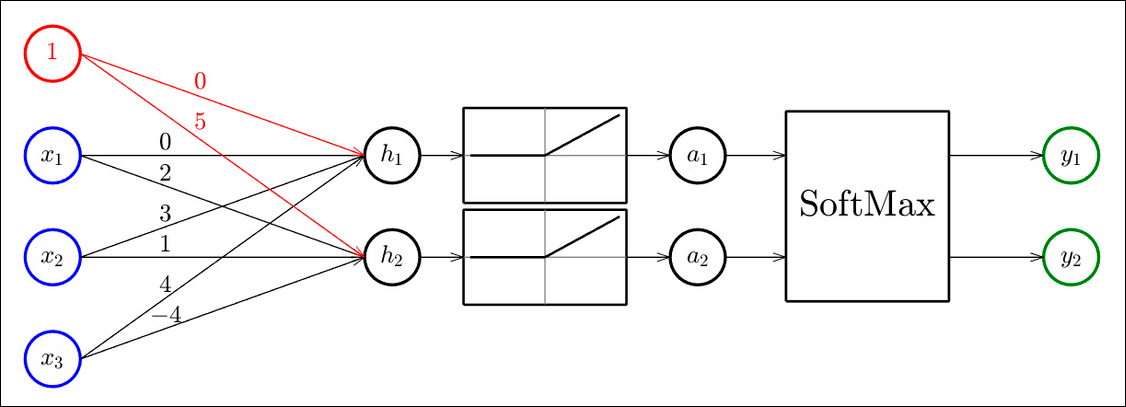

In [19]:
W = np.array([[0, 5], [0, 2], [3, 1], [4, -4]])
x = np.array([1, 2, 3])

h = W.T @ np.insert(x, 0, 1)
y = softmax(ReLU(h))
y

array([9.99999985e-01, 1.52299795e-08])

__Перцептрон и основная теорема об апроксимации__ (теорема Цыбенко, 1989)

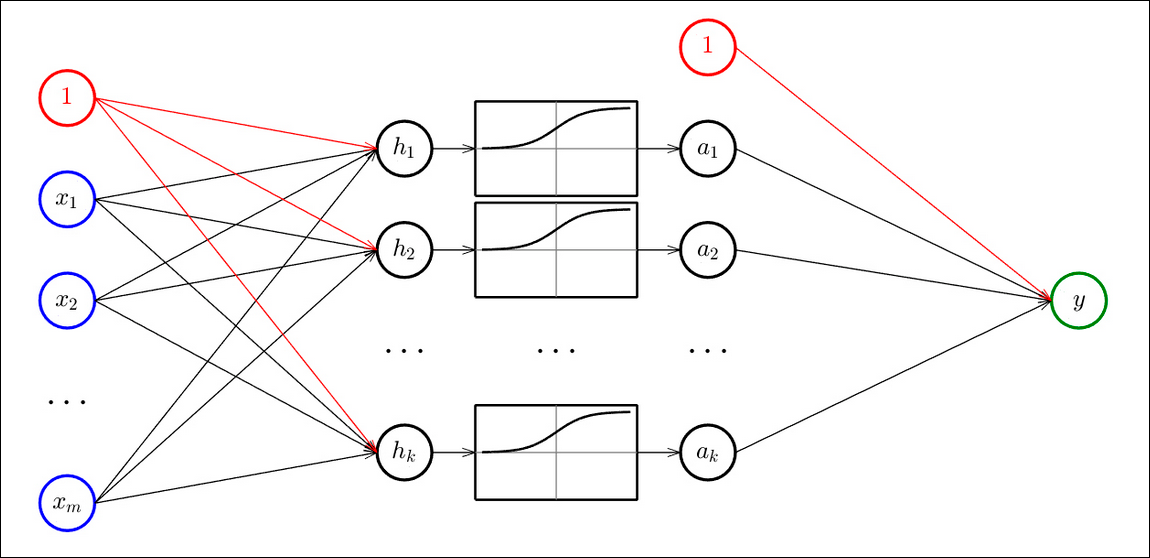

__Суть__: Любая непрерывная функция многих переменных может быть приближена перцептроном с сигмоидальной функцией активации с любой наперед заданной точностью. Иначе говоря, любая непрерывная функция может быть сымитирована нейросетью с одним скрытым слоем.
***